In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import missingno as msno
import sklearn as sk
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


# Objective
The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

# Source
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. 
## Constraints
In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Features:

    Pregnancies: Number of times pregnant
    
    Glucose: Plasma glucose concentration 2 hours in an oral glucose tolerance test
    
    Blood Pressure: Diastolic blood pressure (mm Hg)
    
    Skin Thickness: Triceps skin fold thickness (mm
    
    Insulin: 2-Hour serum insulin (mu U/ml)
    
    BMI: Body mass index (weight in kg/(height in m)^2) 
    
    Diabetes Pedigree Function: Diabetes pedigree function
    
    Age: Age (years)
    
    Outcome: Class variable (0 or 1) 0 mean non-diabetic and 1 means diabetic
    

# Inspection of dataset

In [2]:
diabetes = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
print("Number of row and columns in dataset","-"*130)
display(diabetes.shape)
print("First five row of dataset","-"*145)
display(diabetes.head())
print("Last five row of dataset","-"*145)
display(diabetes.tail())
print("data type  of each values","-"*145)
display(diabetes.dtypes)
print("Null values in dataset","-"*145)
display(diabetes.isnull().sum())

Number of row and columns in dataset ----------------------------------------------------------------------------------------------------------------------------------


(768, 9)

First five row of dataset -------------------------------------------------------------------------------------------------------------------------------------------------


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Last five row of dataset -------------------------------------------------------------------------------------------------------------------------------------------------


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


data type  of each values -------------------------------------------------------------------------------------------------------------------------------------------------


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Null values in dataset -------------------------------------------------------------------------------------------------------------------------------------------------


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Observation

-----------------------------------------



# Exploratory Data Analyis

### Changing dtype and zero with NaN

In [3]:
diabetes = diabetes.astype({"Outcome":'category'})
cols =['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']
diabetes[cols] = diabetes[cols].replace({'0':np.nan, 0:np.nan})
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### Missiing Values

<AxesSubplot:>

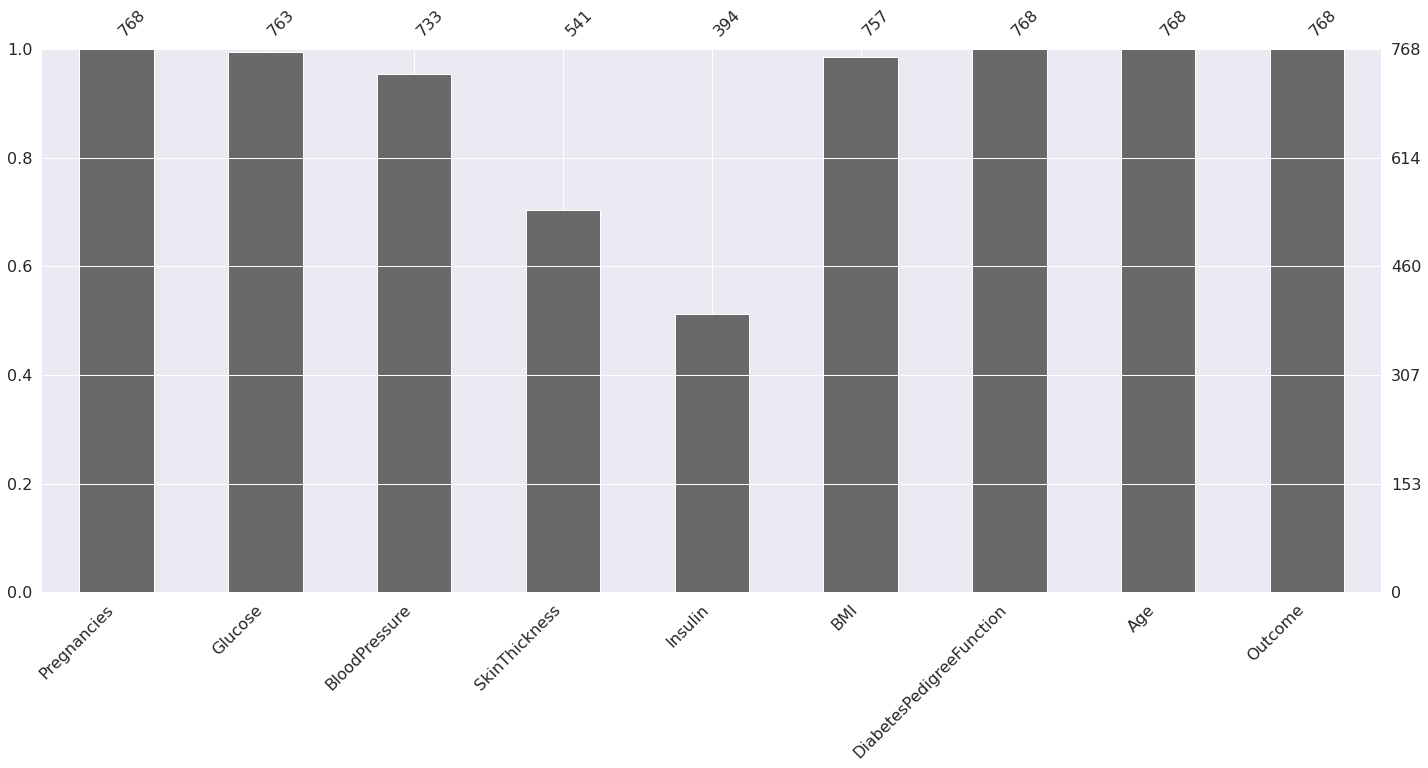

In [4]:
msno.bar(diabetes)

Observation

_______________________________________________________________________________________


# Statistical Summary of dataset / Center of Measure

In [5]:
diabetes.describe().round().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,4.0,3.0,0.0,1.0,3.0,6.0,17.0
Glucose,763.0,122.0,31.0,44.0,99.0,117.0,141.0,199.0
BloodPressure,733.0,72.0,12.0,24.0,64.0,72.0,80.0,122.0
SkinThickness,541.0,29.0,10.0,7.0,22.0,29.0,36.0,99.0
Insulin,394.0,156.0,119.0,14.0,76.0,125.0,190.0,846.0
BMI,757.0,32.0,7.0,18.0,28.0,32.0,37.0,67.0
DiabetesPedigreeFunction,768.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
Age,768.0,33.0,12.0,21.0,24.0,29.0,41.0,81.0


Observation

-----------------------------------------


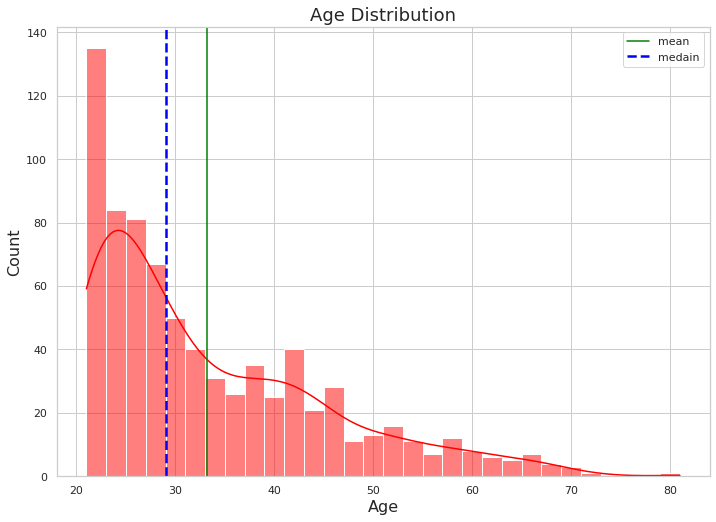

In [6]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="whitegrid")
sns.histplot(diabetes['Age'], kde=True, color='red', bins=30)
plt.title('Age Distribution', fontsize=18)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.axvline(x=diabetes.Age.mean(),color='green',label='mean')
plt.axvline(x=diabetes.Age.median(),color='blue',ls='--',lw=2.5,label='medain')
plt.legend();

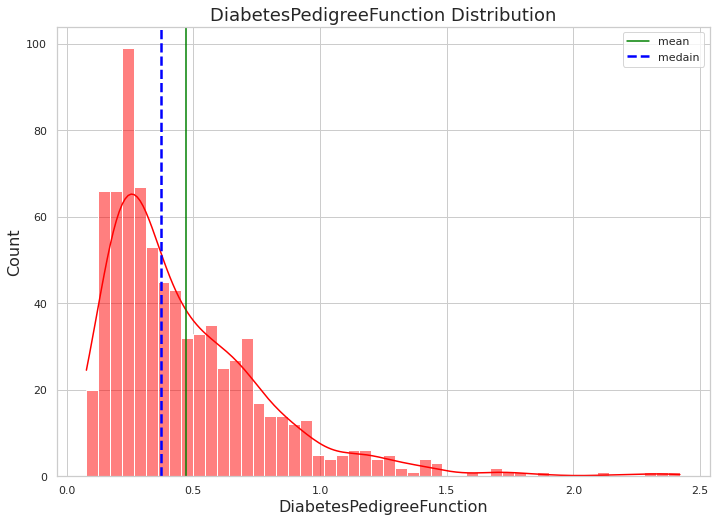

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="whitegrid")
sns.histplot(diabetes['DiabetesPedigreeFunction'], kde=True, color='red', bins=50)
plt.title('DiabetesPedigreeFunction Distribution', fontsize=18)
plt.xlabel('DiabetesPedigreeFunction', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.axvline(x=diabetes.DiabetesPedigreeFunction.mean(),color='green',label='mean')
plt.axvline(x=diabetes.DiabetesPedigreeFunction.median(),color='blue',ls='--',lw=2.5,label='medain')
plt.legend();

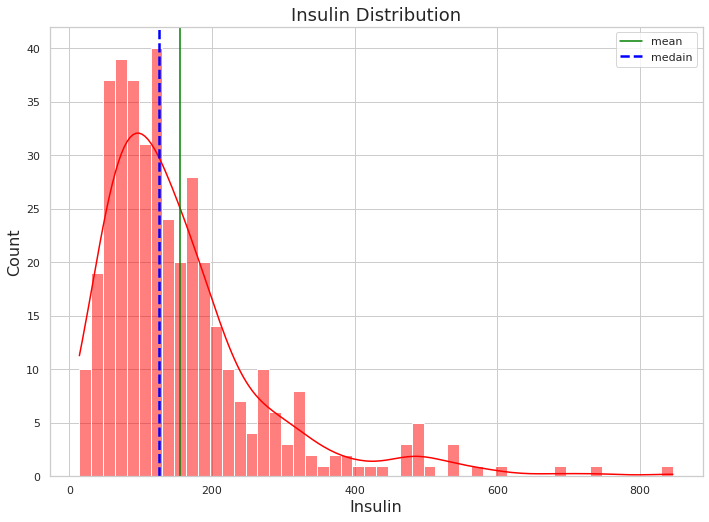

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="whitegrid")
sns.histplot(diabetes['Insulin'], kde=True, color='red', bins=50)
plt.title('Insulin Distribution', fontsize=18)
plt.xlabel('Insulin', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.axvline(x=diabetes.Insulin.mean(),color='green',label='mean')
plt.axvline(x=diabetes.Insulin.median(),color='blue',ls='--',lw=2.5,label='medain')
plt.legend();

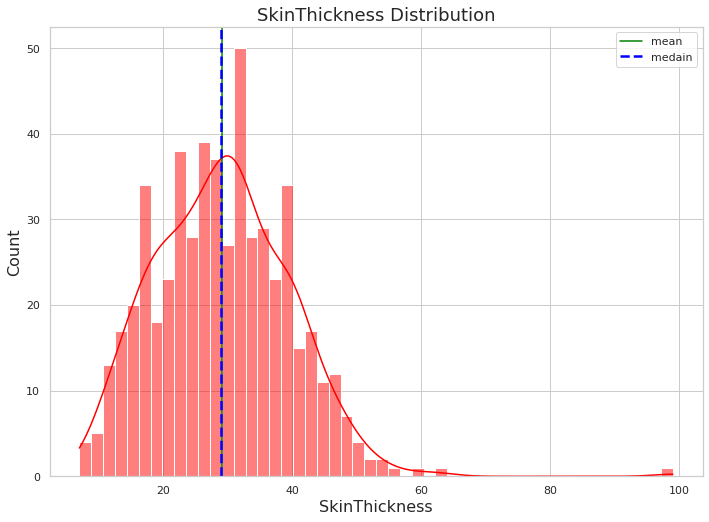

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="whitegrid")
sns.histplot(diabetes['SkinThickness'], kde=True, color='red', bins=50)
plt.title('SkinThickness Distribution', fontsize=18)
plt.xlabel('SkinThickness', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.axvline(x=diabetes.SkinThickness.mean(),color='green',label='mean')
plt.axvline(x=diabetes.SkinThickness.median(),color='blue',ls='--',lw=2.5,label='medain')
plt.legend();

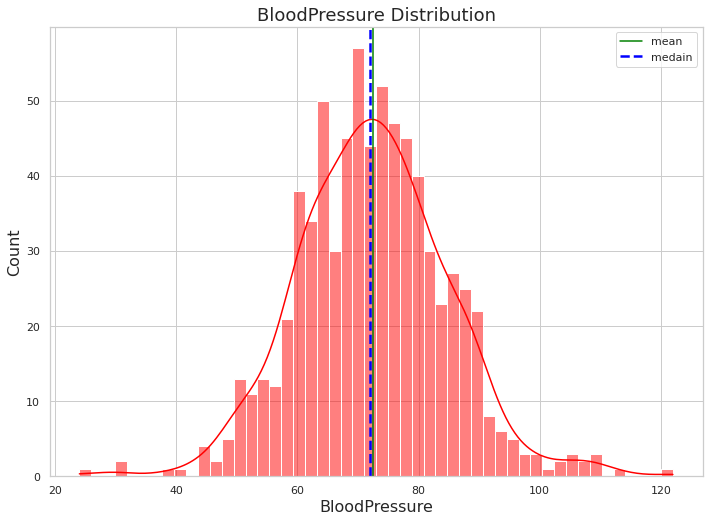

In [10]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="whitegrid")
sns.histplot(diabetes['BloodPressure'], kde=True, color='red', bins=50)
plt.title('BloodPressure Distribution', fontsize=18)
plt.xlabel('BloodPressure', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.axvline(x=diabetes.BloodPressure.mean(),color='green',label='mean')
plt.axvline(x=diabetes.BloodPressure.median(),color='blue',ls='--',lw=2.5,label='medain')
plt.legend();

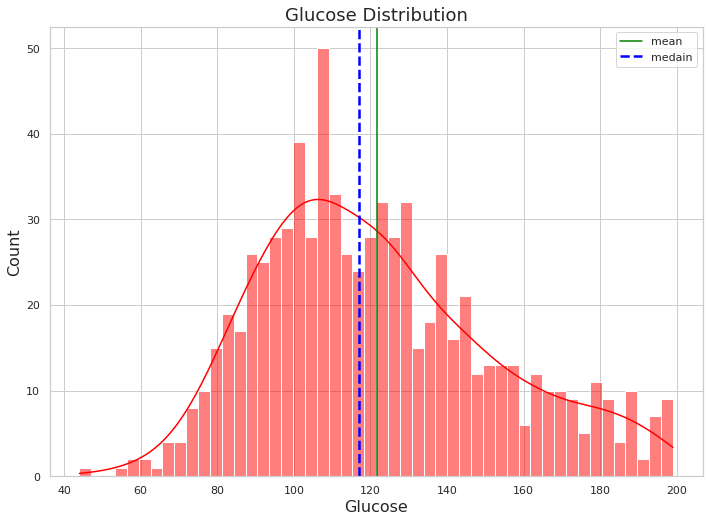

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="whitegrid")
sns.histplot(diabetes['Glucose'], kde=True, color='red', bins=50)
plt.title('Glucose Distribution', fontsize=18)
plt.xlabel('Glucose', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.axvline(x=diabetes.Glucose.mean(),color='green',label='mean')
plt.axvline(x=diabetes.Glucose.median(),color='blue',ls='--',lw=2.5,label='medain')
plt.legend();

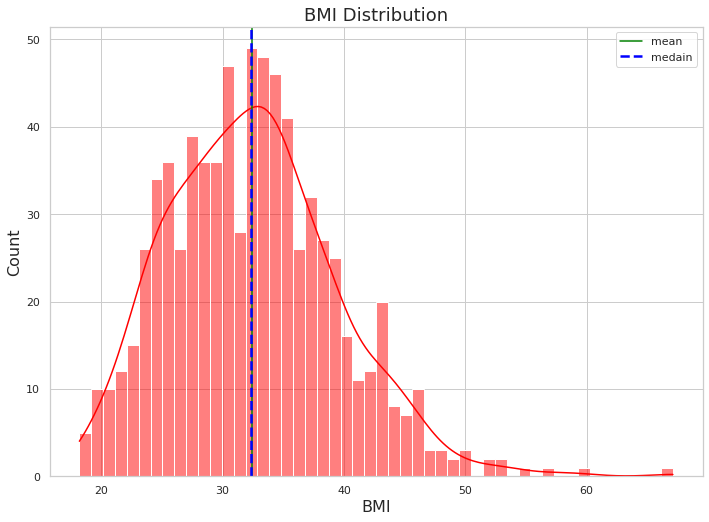

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="whitegrid")
sns.histplot(diabetes['BMI'], kde=True, color='red', bins=50)
plt.title('BMI Distribution', fontsize=18)
plt.xlabel('BMI', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.axvline(x=diabetes.BMI.mean(),color='green',label='mean')
plt.axvline(x=diabetes.BMI.median(),color='blue',ls='--',lw=2.5,label='medain')
plt.legend();

Observation
----------------------------




# Outlier & Five Point Summary

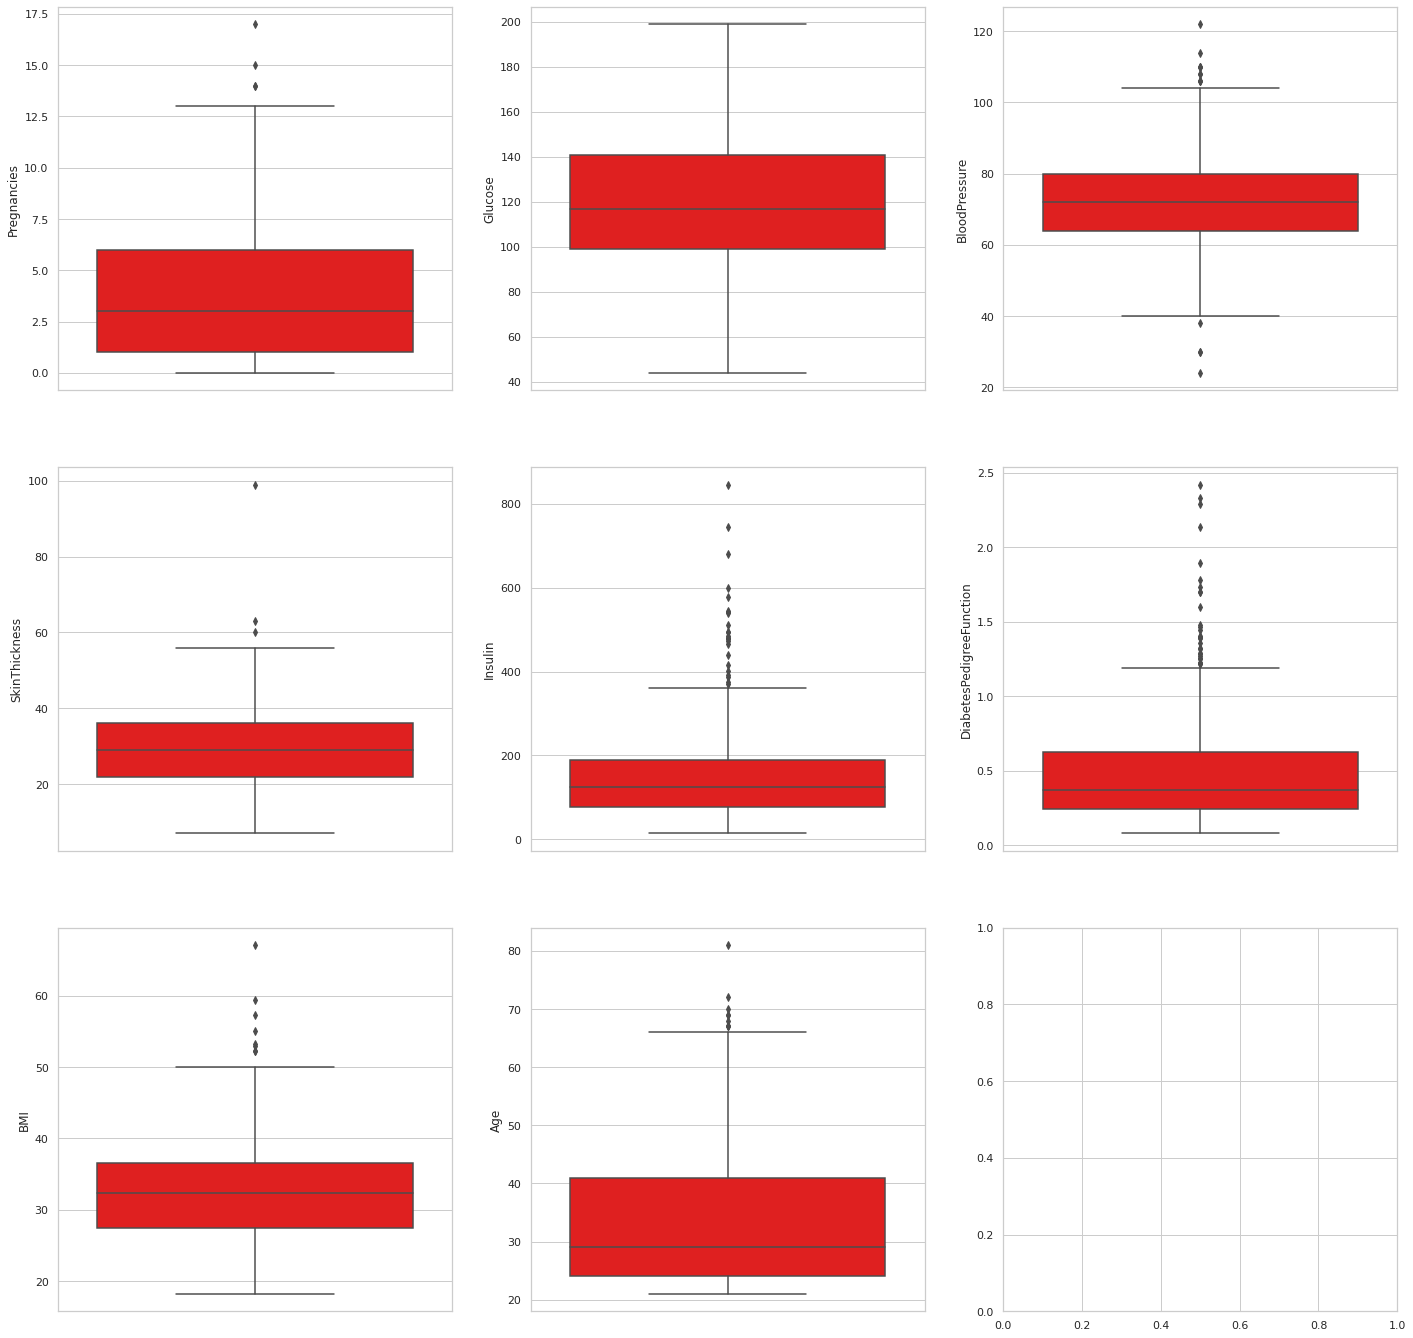

In [13]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(24,24), nrows=3, ncols=3)
sns.boxplot(data=diabetes, y="Pregnancies", ax=ax[0,0], color='red')
sns.boxplot(data=diabetes, y="Glucose", ax=ax[0,1], color='red')
sns.boxplot(data=diabetes, y="BloodPressure", ax=ax[0,2], color='red')
sns.boxplot(data=diabetes, y="SkinThickness", ax=ax[1,0], color='red')
sns.boxplot(data=diabetes, y="Insulin", ax=ax[1,1], color='red')
sns.boxplot(data=diabetes, y="Age", ax=ax[2,1], color='red')
sns.boxplot(data=diabetes, y="BMI", ax=ax[2,0], color='red')
sns.boxplot(data=diabetes, y="DiabetesPedigreeFunction", ax=ax[1,2], color='red');

Observation
----------------------------


# Correlation Matrix

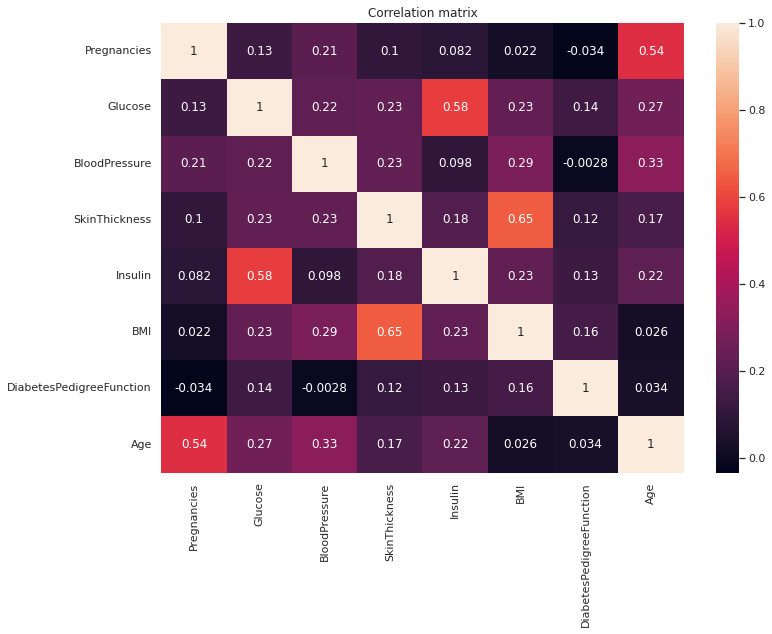

In [14]:
hm = sns.heatmap(diabetes.corr(), annot = True)

hm.set(title = "Correlation matrix")

plt.show()

# Feature Engenering

## 1. Filling NuN Values

In [15]:
diabetes['SkinThickness'].fillna(int(diabetes['SkinThickness'].median()), inplace=True)
diabetes['Insulin'].fillna(int(diabetes['Insulin'].median()), inplace=True)

## 2. Making New Categorical Feature from Numerical

In [16]:
diabetes.loc[(diabetes["Age"] >= 21) & (diabetes["Age"] < 50), "age_group"] = "Adult"
diabetes.loc[(diabetes["Age"] >= 50), "age_group"] = "Senior"
diabetes["Glucose_Range"] = pd.cut(x=diabetes["Glucose"], bins=[0, 140, 200, 300], labels=["Normal", "Prediabetes", "Diabetes"])
diabetes['BMI_Group'] = pd.cut(x=diabetes['BMI'], bins=[0, 18.5, 24.9, 29.9, 100],labels=["Underweight", "Healthy", "Overweight", "Obese"])

## 3. Transformation of Numerical Varraible 

In [17]:
diabetes['SkinThickness_log']=np.log(diabetes['SkinThickness'])
diabetes['DiabetesPedigreeFunction_log']=np.log(diabetes['DiabetesPedigreeFunction'])
diabetes['Insulin_log']=np.log(diabetes['Insulin'])

In [18]:
sugar=diabetes[['age_group','BMI_Group', 'BloodPressure','SkinThickness_log',
       'Glucose_Range',  'Insulin_log','Pregnancies',
       'DiabetesPedigreeFunction_log','Outcome']].copy()

## 4. One hot enconding

In [19]:
X= sugar.drop(columns='Outcome',axis=1)

In [20]:
X_f = pd.get_dummies(X)

In [21]:
X_f

,BloodPressure,SkinThickness_log,Insulin_log,Pregnancies,DiabetesPedigreeFunction_log,age_group_Adult,age_group_Senior,BMI_Group_Underweight,BMI_Group_Healthy,BMI_Group_Overweight,BMI_Group_Obese,Glucose_Range_Normal,Glucose_Range_Prediabetes,Glucose_Range_Diabetes
0,72.0,3.555348,4.828314,6,-0.466809,0,1,0,0,0,1,0,1,0
1,66.0,3.367296,4.828314,1,-1.046969,1,0,0,0,1,0,1,0,0
2,64.0,3.367296,4.828314,8,-0.397497,1,0,0,1,0,0,0,1,0
3,66.0,3.135494,4.543295,1,-1.789761,1,0,0,0,1,0,1,0,0
4,40.0,3.555348,5.123964,0,0.827678,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,76.0,3.871201,5.192957,10,-1.766092,0,1,0,0,0,1,1,0,0
764,70.0,3.295837,4.828314,2,-1.078810,1,0,0,0,0,1,1,0,0
765,72.0,3.135494,4.718499,5,-1.406497,1,0,0,0,1,0,1,0,0
766,60.0,3.367296,4.828314,1,-1.052683,1,0,0,0,0,1,1,0,0


## 5. Scalling

In [22]:
num=['BloodPressure','Pregnancies']

In [23]:
scaler = RobustScaler()
X_f[num] = scaler.fit_transform(X_f[num])

In [24]:
X_f

,BloodPressure,SkinThickness_log,Insulin_log,Pregnancies,DiabetesPedigreeFunction_log,age_group_Adult,age_group_Senior,BMI_Group_Underweight,BMI_Group_Healthy,BMI_Group_Overweight,BMI_Group_Obese,Glucose_Range_Normal,Glucose_Range_Prediabetes,Glucose_Range_Diabetes
0,0.000,3.555348,4.828314,0.6,-0.466809,0,1,0,0,0,1,0,1,0
1,-0.375,3.367296,4.828314,-0.4,-1.046969,1,0,0,0,1,0,1,0,0
2,-0.500,3.367296,4.828314,1.0,-0.397497,1,0,0,1,0,0,0,1,0
3,-0.375,3.135494,4.543295,-0.4,-1.789761,1,0,0,0,1,0,1,0,0
4,-2.000,3.555348,5.123964,-0.6,0.827678,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.250,3.871201,5.192957,1.4,-1.766092,0,1,0,0,0,1,1,0,0
764,-0.125,3.295837,4.828314,-0.2,-1.078810,1,0,0,0,0,1,1,0,0
765,0.000,3.135494,4.718499,0.4,-1.406497,1,0,0,0,1,0,1,0,0
766,-0.750,3.367296,4.828314,-0.4,-1.052683,1,0,0,0,0,1,1,0,0


In [25]:
high=X_f.drop(['BloodPressure'],axis=1)

In [26]:
high

,SkinThickness_log,Insulin_log,Pregnancies,DiabetesPedigreeFunction_log,age_group_Adult,age_group_Senior,BMI_Group_Underweight,BMI_Group_Healthy,BMI_Group_Overweight,BMI_Group_Obese,Glucose_Range_Normal,Glucose_Range_Prediabetes,Glucose_Range_Diabetes
0,3.555348,4.828314,0.6,-0.466809,0,1,0,0,0,1,0,1,0
1,3.367296,4.828314,-0.4,-1.046969,1,0,0,0,1,0,1,0,0
2,3.367296,4.828314,1.0,-0.397497,1,0,0,1,0,0,0,1,0
3,3.135494,4.543295,-0.4,-1.789761,1,0,0,0,1,0,1,0,0
4,3.555348,5.123964,-0.6,0.827678,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,3.871201,5.192957,1.4,-1.766092,0,1,0,0,0,1,1,0,0
764,3.295837,4.828314,-0.2,-1.078810,1,0,0,0,0,1,1,0,0
765,3.135494,4.718499,0.4,-1.406497,1,0,0,0,1,0,1,0,0
766,3.367296,4.828314,-0.4,-1.052683,1,0,0,0,0,1,1,0,0


In [27]:
X_f.isnull().sum()

BloodPressure                   35
SkinThickness_log                0
Insulin_log                      0
Pregnancies                      0
DiabetesPedigreeFunction_log     0
age_group_Adult                  0
age_group_Senior                 0
BMI_Group_Underweight            0
BMI_Group_Healthy                0
BMI_Group_Overweight             0
BMI_Group_Obese                  0
Glucose_Range_Normal             0
Glucose_Range_Prediabetes        0
Glucose_Range_Diabetes           0
dtype: int64

# Univarate And multivate analysis

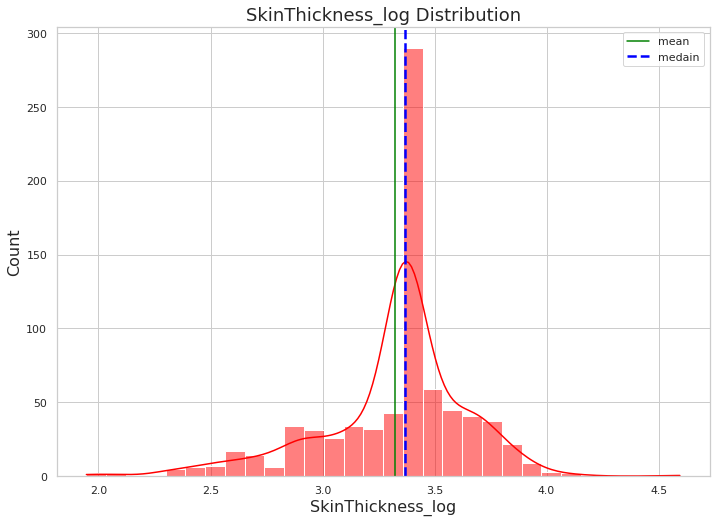

In [28]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="whitegrid")
sns.histplot(diabetes['SkinThickness_log'], kde=True, color='red', bins=30)
plt.title('SkinThickness_log Distribution', fontsize=18)
plt.xlabel('SkinThickness_log', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.axvline(x=diabetes.SkinThickness_log.mean(),color='green',label='mean')
plt.axvline(x=diabetes.SkinThickness_log.median(),color='blue',ls='--',lw=2.5,label='medain')
plt.legend();

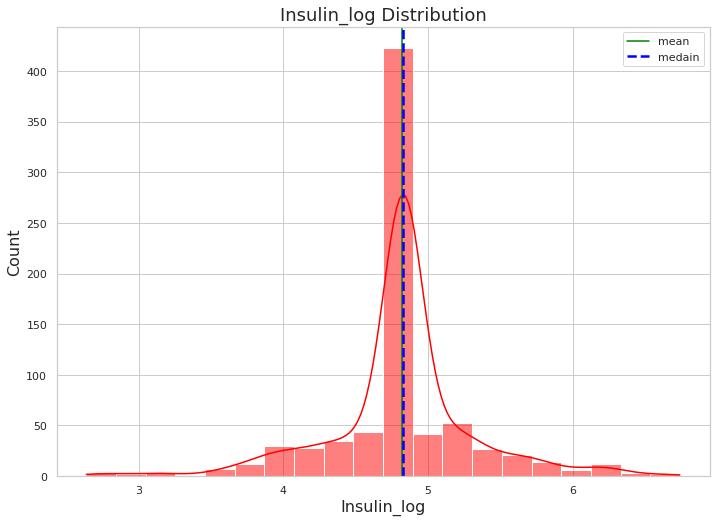

In [29]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="whitegrid")
sns.histplot(diabetes['Insulin_log'], kde=True, color='red', bins=20)
plt.title('Insulin_log Distribution', fontsize=18)
plt.xlabel('Insulin_log', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.axvline(x=diabetes.Insulin_log.mean(),color='green',label='mean')
plt.axvline(x=diabetes.Insulin_log.median(),color='blue',ls='--',lw=2.5,label='medain')
plt.legend();

In [30]:
sugar=diabetes[['age_group','BMI_Group', 'BloodPressure','SkinThickness_log',
       'Glucose_Range',  'Insulin_log','Pregnancies',
       'DiabetesPedigreeFunction_log','Outcome']]

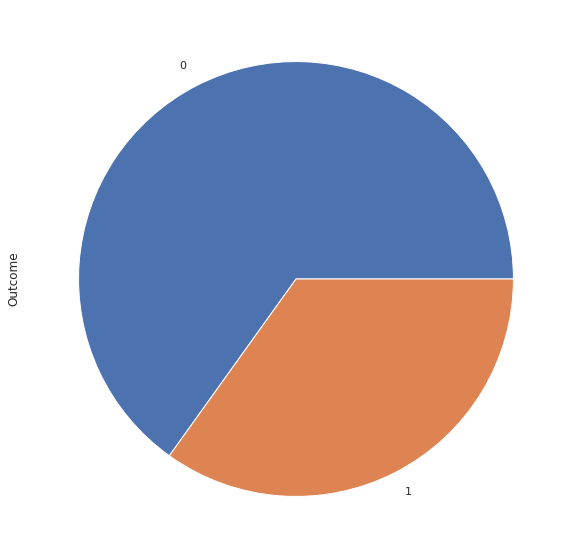

In [31]:
diabetes['Outcome'].value_counts().plot(kind='pie',figsize=(10, 10));

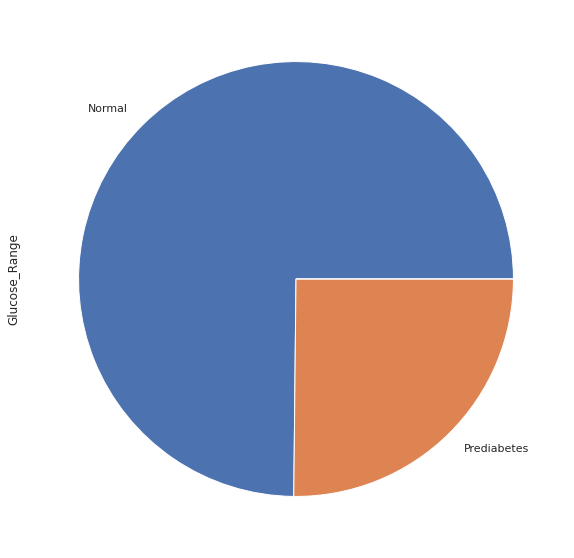

In [32]:
diabetes['Glucose_Range'].value_counts().plot(kind='pie',figsize=(10, 10));

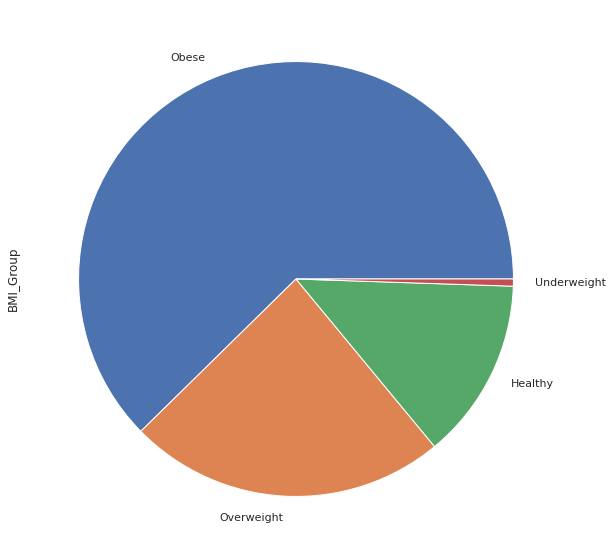

In [33]:
diabetes['BMI_Group'].value_counts().plot(kind='pie',figsize=(10, 10));

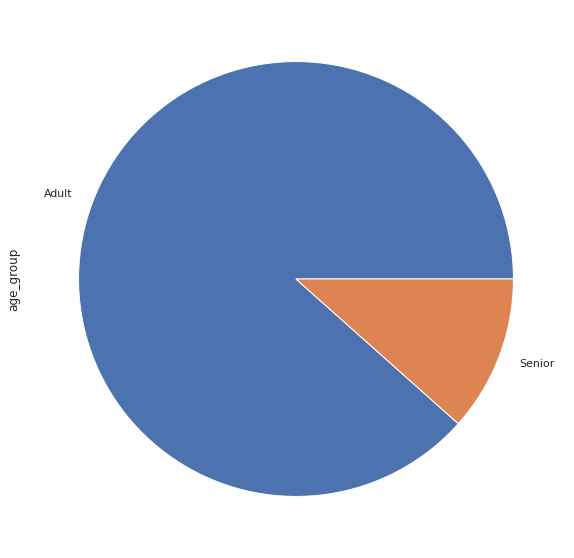

In [34]:
diabetes['age_group'].value_counts().plot(kind='pie',figsize=(10, 10));

# Model building

###  1. split into train and test data

In [35]:
Y=diabetes['Outcome']

In [36]:
labels = Y
features =X_f
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, stratify=labels,random_state = 2)

In [37]:
train_features.replace([np.inf, -np.inf], np.nan, inplace=True)
test_features.replace([np.inf, -np.inf], np.nan, inplace=True)
train_features.fillna(999, inplace=True)
test_features.fillna(999, inplace=True)

# Training and Prediction

## 1.Logestic regression

In [38]:
model = LogisticRegression(solver='liblinear')
model.fit(train_features, train_labels);

In [39]:
predictions = model.predict(train_features)
training_data_accuracy =  accuracy_score(predictions,train_labels)
training_data_accuracy

0.7638436482084691

In [40]:
predictions_test = model.predict(test_features)
test_data_accuracy =  accuracy_score(predictions_test,test_labels)
test_data_accuracy

0.7727272727272727

## 2. RandomForestClassifier

In [41]:
rf_model = RandomForestClassifier(random_state=46).fit(train_features, train_labels)
y_pred = rf_model.predict(test_features)

print(f"Accuracy: {round(accuracy_score(y_pred, test_labels), 2)}")
print(f"Recall: {round(recall_score(y_pred,test_labels),3)}")
print(f"Precision: {round(precision_score(y_pred,test_labels), 2)}")
print(f"F1: {round(f1_score(y_pred,test_labels), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred,test_labels), 2)}")

Accuracy: 0.73
Recall: 0.65
Precision: 0.48
F1: 0.55
Auc: 0.7
